## Customer Need Assessment Model (Part-3): Regression Analysis

<p style="text-align: center;">By T. B. Tesema  and Stefan Gucu </p> 

<a href='#Summary'>Summary</a><br>
<a href='#Multiple Linear Regression'> Multiple Linear Regression</a><br>
<a href='#Pearson Correlation'>Pearson Correlation</a><br>
<a href='#Polynomial Regression'>Polynomial Regression</a><br>
<a href='#Ridge Regression'>Ridge Regression</a><br>
<a href='#Grid Search'>Grid Search</a> <br>

<a name = 'Summary'></a>
<h3>Summary</h3>

The model has been presumably developed on pizza sales data. Its purpose is to introduce a simple model for customer need assessment. An initial previous analysis indicated that two attributes, income and age were highly associated with the frequency of customer pizza orders. 

The present analysis has used Regression models: Linear Regression, Polynomial Regression, Ridge Regression and Grid Search have been analyzed intensively. Key indicators in Regression methodologies are mean square error (MSE) and R_square. In this regard, these models resulted in high correlations, ranging from   0.84 to 1.0 R_square and low MSE. Nevertheless, Polynomial Regression produced the highest R_square value for observed y and predicted y (R2 = 1.0) compared to the other three models, as shown in the following table. Similarly, Polynomial Regression is also associated with the lowest MSE, 1.56e-29, almost zero. The analysis has been conducted on a test dataset with two degree quadratic equations.
 
| Model               |Mean Square Error|R_Square|Degree|
|---------------------|-----------------|--------|------|
|Linear Regression    |   1.9381        |   0.84 |  2   |
|                     |                 |        |      |
|Polynomial Regression|    1.56E-29     |   1.0  |  2   |
|                     |                 |        |      |
|Ridge Regression     |    0.3280       |  0.96  |  2   |
|                     |                 |        |      |
|Gride Search         |     N/A         |  0.87  |  2   |
|                     |                 |        |      |

The Model Part-1, consisted of relevant visualizations has been published with introduction at  [Github](https://github.com/Tesema-B/Tesema-B/blob/679b05d29c54aebcf94a2fd3921fd7da1a74e9ee/CUSTOMER%20NEED%20ASSESSMENT.ipynb). Mdel Part-2, Clustering has been also published on [Github](https://github.com/Tesema-B/Tesema-B/blob/master/CUSTOMER%20NEED%20ASSESSMENT-PART-2.ipynb). The present article is Part-3. The publication of Part-4, Logistic Regression will be available in the future.

In [1]:
#Import Needed Libraries

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# %%capture
# ! pip install ipywidgets
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

from botocore.client import Config
import ibm_boto3

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
# The code was removed by Watson Studio for sharing.

,Order_ID,Pizza_Type,Zip_Code,Gender,Age,Income,Order_Frequency,Status
0,P000,Cheese,75008,F,20,30,4,V
1,P001,Veggie,75010,M,50,98,10,C
2,P002,Pepperoni,75011,M,36,46,8,C
3,P003,Meat,75012,F,22,35,5,A
4,P004,Margerhita,75013,F,45,85,9,C


<a name = 'Multiple Linear Regression'></a>
<h3>Multiple Linear Regression</h3>

Multiple Linear Regression is actually similar to simple Linear Regression, but the difference is Multiple Regression explain the relationship between one continuous dependent variable and two or more predictors (independent variables). It is expressed in the following equasion, where y_hat represents predicted y value.
y_hat = a + b1X1 + b2X2 + b3X3 + bX4 + ...

In [3]:
# Since visualization has been published in Part-1, let jamp to data analysis.
# Let us first define four the colomuns of df above in the relation to Order_Frequency and predict the same.

df_r = df[['Age', 'Income', 'Order_Frequency']]
Z = df[['Age', 'Income']]
y = df['Order_Frequency'] 

<a name = 'Pearson Correlation'></a>
<h3>Pearson Correlation</h3>

Pearson correlation is most appropriate when the relationship between the two variables is linear. The table below, helps us to examine, specifically individual correlation between two variables or a variable by itself, for instance, correlation between Income and Income is maximum correlation, which is one. We can easily calculate Pearson correlation coefficient using pandas' function as shown below.

In [5]:
corr = df_r.corr()
corr.head()

,Age,Income,Order_Frequency
Age,1.000000,0.606671,0.388658
Income,0.606671,1.000000,0.897950
Order_Frequency,0.388658,0.897950,1.000000


Text(0.5, 1.0, 'Pearsons-Correlation')

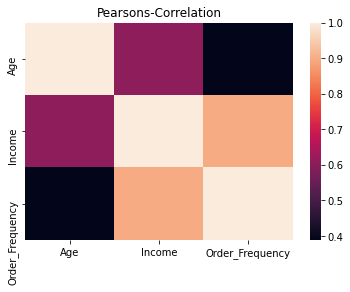

In [6]:
# Let us visualize the Pearson correlation coefficient illustrated above by using seaborn:

sns.heatmap(corr,xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.title("Pearsons-Correlation")

**Obtaining correlation** (r) and p_values: The pandas function above has calculated Pearson correlation vales for the of the variables, but, without p_values called significant level(s). Whether a particular test is significant or not depends on a given p value. A small p or close to zero is preferable. we can calculate both r and p_value by importing scipy.stats, for the above attributes.

In [7]:
from scipy import stats

X1 = df_r['Age']
X2 = df_r['Income']
y = df_r['Order_Frequency']

pearsonr_coefficient, p_value = stats.pearsonr(X1, y)
print("Pearsonr=%0.3f, P_value=%0.3f" % (pearsonr_coefficient, p_value))

pearsonr_coefficient, p_value = stats.pearsonr(X2, y)
print("Pearsonr=%0.3f, P_value=%0.3f" % (pearsonr_coefficient, p_value))

Pearsonr=0.389, P_value=0.000
Pearsonr=0.898, P_value=0.000


In [8]:
from sklearn.model_selection import train_test_split
array = df.values
X = array[:, 4:6]
y = array[:, 6]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.02, random_state = 1)

print(X.shape)
print(y.shape)

(230, 2)
(230,)


In [9]:
# Creating object
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
# Then, let us predict the Order_Frequency and see the first 25 cases:
y_hat = lr.predict(Z)
y[0:25]

array([4, 10, 8, 5, 9, 8, 9, 3, 2, 6, 3, 10, 4, 7, 3, 2, 11, 4, 4, 9, 8,
       8, 8, 12, 11], dtype=object)

#### Let calculate other key indicators as follows, including mean square error(MSE):

MSE is difference between observed and expected values of target variable called a dependent variable, (observed_y and predicted_y).

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_hat)
print('The mean square error, difference between observed Order_Frequency and predicted Order_Frequency is: ', mse)

The mean square error, difference between observed Order_Frequency and predicted Order_Frequency is:  1.4557290602017


In [13]:
#Slope
#It is the amount of change that occur in y or dependent variable as a result a unit increase or decrease in X

lr.coef_

array([-0.06630623,  0.11552382])

In [14]:
#Intercept
# a constant response value when all of the explanatory variables are with zero effect.
lr.intercept_

1.9381014286734999

In [15]:
# Let us calculate R-Square
from sklearn.metrics import r2_score

R2 = r2_score(y, y_hat)
print('R2 = ', R2)

R2 =  0.8448656570869428


The total Order_Frequency of these variables are summarized in the following quadratic equation:   
y_hat = a + b1X1 + b2**2

**Distribution Plot **: Let us draw the distributions of observed Order_Frequency and predicted Order_Frequency, then compare them. The closeness of the two lines should be the indication of the fitness of the model. In the present case, as can be seen from the figure, the predicted Order_Frequency is not close to the actual Order_Frequency since theere is a large gap at the top of the figure. Thus, there is a room for improvement and to take up an alternative method called polymonial regression, as discussed below.

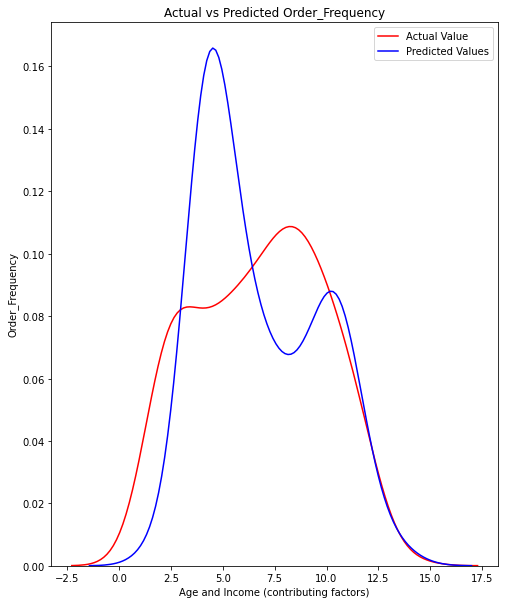

In [16]:
# The following codes used for plot the distribution are provided at IBM Cloud, Cognitive Skills Network Lab
# but made minor modifications.

width = 8
height = 10

plt.figure(figsize=(width, height))


ax1 = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Predicted Values" , ax=ax1)


plt.title('Actual vs Predicted Order_Frequency')
plt.xlabel('Age and Income (contributing factors)')
plt.ylabel('Order_Frequency')

plt.show()
plt.close()

<a name = 'Polynomial Regression'></a>
<h3>Polynomial Regression</h3>

Let us apply Polynomial transform and then regression analysis on the same data.

#### Polynomial Features
Polynomial features are those features created by raising existing features to an exponent.

For example, if a dataset had one input feature X, then a polynomial feature would be the addition of a new feature (column) where values were calculated by squaring the values in X, e.g. X^2. This process can be repeated for each input variable in the dataset, creating a transformed version of each.

As such, polynomial features are a type of feature engineering, e.g. the creation of new input features based on the existing features.

The “degree” of the polynomial is used to control the number of features added, e.g. a degree of 3 will add two new variables for each input variable. Typically a small degree is used such as 2 or 3 and more than the degree of 4 is unusual. 

In the next lines, we will experiment feature transformation and select an optimum degree for the current data.  

In [17]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree=2)
X_train_pr = pr.fit_transform(X_train)
X_test_pr = pr.fit_transform(X_test)
pr

PolynomialFeatures()

##### Next step is creating a linear regression model "poly" and training it

In [18]:
poly = LinearRegression()
poly.fit(X_train_pr, y_train)

LinearRegression()

In [19]:
y_train_poly_pred = poly.predict(X_train_pr)
y_train_poly_pred[0:15]

array([ 5.4136823 ,  8.17702605,  5.85978869,  5.2701947 ,  2.13437142,
       11.10157955,  9.15752344, 10.0090946 ,  5.17623302,  7.47138509,
        4.96069281,  3.51404871,  4.93916784,  3.29960544,  7.98707421])

In [20]:
# Let us calculate the mean error for observed y_train and y_train_poly_pred after Polynomial transform.
mse = mean_squared_error(y_train, y_train_poly_pred)
print('The mean square error' '\n' 'difference between' '\n' 'observed training Order_Frequency and predicted training value: ', mse)

The mean square error
difference between
observed training Order_Frequency and predicted training value:  0.9549500592101133


In [21]:
#Let us also test validation data after polynomial transformation

poly.fit(X_test_pr, y_test)

LinearRegression()

In [22]:
#Let us predict y_poly_test

y_poly_test_pred = poly.predict(X_test_pr)
y_poly_test_pred[0:5]

array([ 5.,  3.,  6.,  9., 11.])

In [23]:
# Let's look at the first five and compare predicted and actual values.

print("Predicted Order_Frequency:", y_poly_test_pred[0:5])
print("Actual Order_Frequency:", y_test[0:5])

Predicted Order_Frequency: [ 5.  3.  6.  9. 11.]
Actual Order_Frequency: [5 3 6 9 11]


In [24]:
mse = mean_squared_error(y_test, y_poly_test_pred)
print('The mean square error' '\n' 'difference between' '\n' 'observed test order and predicted test order: ' , mse) 
print( 'this means diffirence is close to zero')

The mean square error
difference between
observed test order and predicted test order:  1.5619445923376034e-29
this means diffirence is close to zero


In [25]:
# Let us estimate R-Square for training data after polynomial transformation:
#R-square of training

R2 = r2_score(y_train, y_train_poly_pred)
print(R2)

0.8985266343687304


In [26]:
#R-Square of validation:

R2 = r2_score(y_test, y_poly_test_pred)
print(R2)

1.0


Text(2, 0.84, 'Maximum R^2 ')

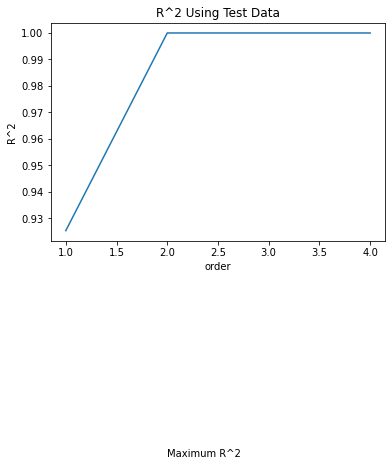

In [27]:
#Let us find out otimal R-Square (Rsqu) in differebt polynomial degrees:
# y_value is concerned, we can use y_test or y_test_pred

Rsqu_optimal = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    X_train_pr = pr.fit_transform(X_train)
    
    X_test_pr = pr.fit_transform(X_test) 
    
    lr.fit(X_test_pr, y_test)
    
    Rsqu_optimal.append(lr.score(X_test_pr, y_test))

plt.plot(order, Rsqu_optimal)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(2, 0.84, 'Maximum R^2 ')    

<a name = 'Ridge Regression'></a>
<h3>Ridge Regression</h3>

Let's perform a degree two polynomial transformation on our data, to use Ridge Regression.

In [34]:
pr=PolynomialFeatures(degree=2)
Xri_train_pr= pr.fit_transform(X_train)
Xri_test_pr= pr.fit_transform(X_test)

In [35]:
# Let's import Ridge from the module linear models.

from sklearn.linear_model import Ridge 

In [36]:
RidgeModel = Ridge(alpha = 0.1)

In [38]:
RidgeModel.fit(Xri_train_pr, y_train)

y_ridge = RidgeModel.predict(Xri_test_pr)

In [39]:
# Similarly, we can obtain a prediction for test:

RidgeModel.fit(Xri_test_pr, y_test)

y_ridge_test = RidgeModel.predict(Xri_test_pr)
y_ridge_test[0:5]


array([ 4.98641926,  3.0016978 ,  6.01819187,  8.99215129, 11.00153978])

In [41]:
# We can select the value of Alfa that minimizes the test error, for example, we can use a for loop.

Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RidgeModel = Ridge(alpha=alfa) 
    RidgeModel.fit(Xri_train_pr, y_train)
    Rsqu_test.append(RidgeModel.score(Xri_test_pr, y_test))
    Rsqu_train.append(RidgeModel.score(Xri_train_pr, y_train))


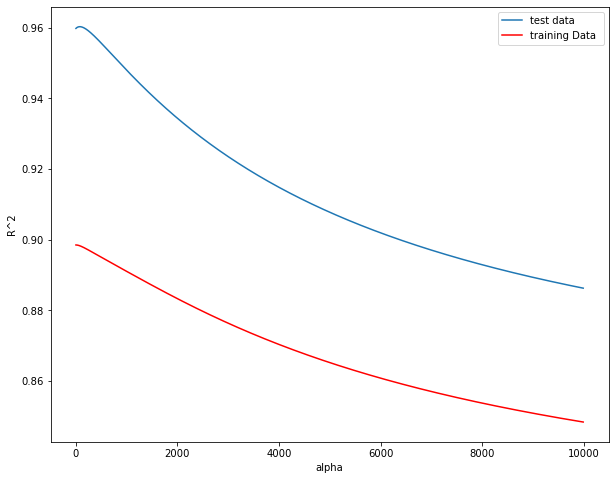

In [42]:
# Then, we can plot out the value of R^2 for different Alphas 

width = 10
height = 8
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='test data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

What we see from the above figure is as alpha also called parameter value increases the R_square value decreases for both training and test dataset. The optimum aplpha value is close to 1000, which is consistent with the alpha range given above for this analysis.

For our comparison purposes, let us figure out both MSE and R_square for observed y test and predicted y-ridge:

In [47]:
mse = mean_squared_error(y_test, y_ridge)
print('The mean square error' '\n' 'difference between' '\n' 'observed test order and predicted test_bridge order: ' , mse) 

The mean square error
difference between
observed test order and predicted test_bridge order:  0.328034519259058


In [49]:
R2 = r2_score(y_test, y_ridge)
print('R2 = ', R2)

R2 =  0.9597996912672723


<a name = 'Grid Search'></a>
<h3>Grid Search</h3>

The term Alfa is a hyperparameter, sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [50]:
# Let's import GridSearchCV from the module model_selection.

from sklearn.model_selection import GridSearchCV

In [51]:
# We create a dictionary of parameter values:

parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]

parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [52]:
# Let us create a ridge regions object, RR:

RR =Ridge()

RR

Ridge()

In [54]:
# Let us create a ridge grid search object

Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [55]:
# Fit the model

Grid1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

The object finds the best parameter values on the test data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:

In [56]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=1000)

In [57]:
# Now let us test our model on the test data, which gives R_square values.

BestRR.score(X_test, y_test)

0.8861569251555129

In conclusion, in Ridge Regression, alpha values can be manually listed in range and then pick an optimum value. In the case of Grid Search, it is the process of performing hyper parameter tuning in order to determine an optimal value for a given model. The best optimum value is selected by an object, e.g. “BestRR” from a given Python dictionary. Default alpha = 0.1 and optimum is estimated to be 1000. It is also called Alfa.